In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matricesAleatorias import matham as mh
import pandas as pd

# Matriz muy grande

In [4]:
nmat = 7000
Hmat = mh.MatrizHamiltoniana(nmat)
densidadmat = mh.DensidadesHam(nmat,4)

In [6]:
HGSEmat = Hmat.GSE()

In [8]:
Evalsmat = np.linalg.eigvalsh(HGSEmat)

In [10]:
EvalsNormmat = Evalsmat / np.sqrt(4*nmat)

In [12]:
mmat = int(nmat/5)
EvalsLinmat = Evalsmat[mmat:-mmat]
EvalsLinNormmat = EvalsNormmat[mmat:-mmat]

In [14]:
#Construcción de los dominios de los eigenvalores lineales
Dommat = np.linspace(mmat,EvalsLinmat.size+mmat,EvalsLinmat.size)
DomNormmat = np.linspace(mmat,EvalsLinNormmat.size+mmat,EvalsLinNormmat.size)

In [72]:
#Se calculan los espaciamientos no normalizados
Espaciamientosmat = np.diff(EvalsLinmat[::2])
deltamat = Espaciamientosmat.mean()
Smat = Espaciamientosmat / deltamat

In [90]:
Evalsmatsinrep = Evalsmat[::2]

In [92]:
rmat = (Evalsmatsinrep[1:-1] - Evalsmatsinrep[2:]) / (Evalsmatsinrep[:-2] - Evalsmatsinrep[1:-1])

In [22]:
Porcentajemat = 100 - 200*mmat/nmat
Porcentajemat

60.0

# Ensamble

In [25]:
nens = 100
nsamp = 100000
Hens = mh.MatrizHamiltoniana(nens)
densidadens = mh.DensidadesHam(nsamp,4)
EvalEns = []

In [29]:
for i in range(nsamp):
    HGSEens = Hens.GSE()
    eval = np.linalg.eigvalsh(HGSEens)
    eval = eval / np.sqrt(nens)
    EvalEns.append(eval)

In [31]:
EvalEns = np.concatenate(EvalEns)

In [33]:
EnsSinRep = []

for i in range(int(nsamp/nens)):
    EvalSamp = EvalEns[0+i*200:200 + i*200:2]
    EnsSinRep.append(EvalSamp)

In [35]:
EnsSinRep = np.concatenate(EnsSinRep)

In [37]:
EnsSinRep.shape

(100000,)

In [39]:
rens = []

In [41]:
for i in range(int(nsamp/nens)):
    EvalSamp = EnsSinRep[0+i*100:100 + i*100]
    rsamp = (EvalSamp[1:-1] - EvalSamp[2:]) / (EvalSamp[:-2] - EvalSamp[1:-1])
    rens.append(rsamp)

In [43]:
rens = np.concatenate(rens)

In [45]:
mens = int(nens/6)
Porcentajeens = 100 - 200*mens/nens
Porcentajeens

68.0

In [47]:
Sens = []

In [49]:
for i in range(int(nsamp/nens)):
    EvalSamp = EnsSinRep[0+i*100:100 + i*100]
    EvalSampLin = EvalSamp[mens:-mens]
    EspaSamp = np.diff(EvalSampLin)
    deltaSamp = EspaSamp.mean()
    Ssamp = EspaSamp / deltaSamp
    Sens.append(Ssamp)

In [51]:
Sens = np.concatenate(Sens)

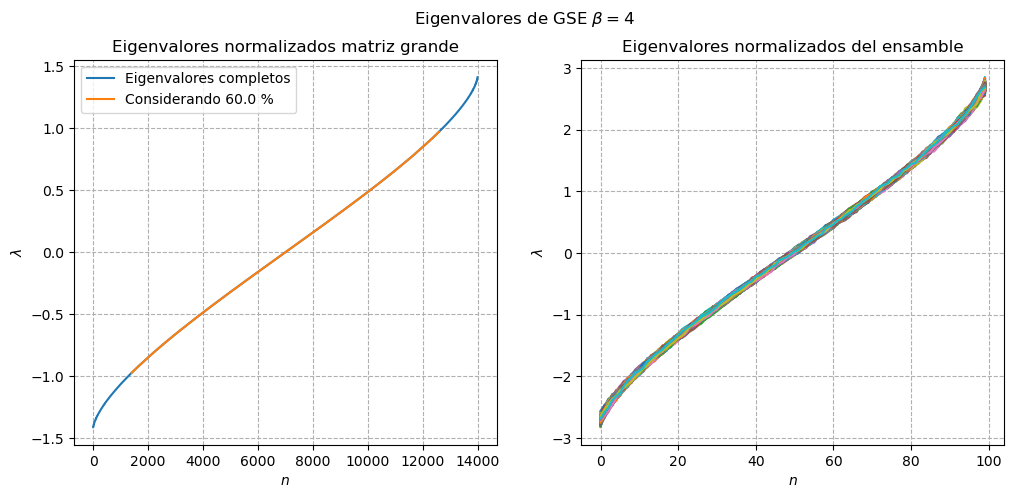

In [53]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

fig.suptitle(r'Eigenvalores de GSE $ \beta=4 $')

ax[0].plot(EvalsNormmat,label='Eigenvalores completos')
ax[0].plot(DomNormmat,EvalsLinNormmat,label=f'Considerando {Porcentajemat} %')
ax[0].set_title('Eigenvalores normalizados matriz grande')
ax[0].grid(True,linestyle='--')
ax[0].legend()
ax[0].set_xlabel(r'$ n $')
ax[0].set_ylabel(r'$ \lambda $')

for i in range(int(nsamp/nens)):
    ax[1].plot(EnsSinRep[0+i*100:100 + i*100])
ax[1].set_title('Eigenvalores normalizados del ensamble')
ax[1].grid(True,linestyle='--')
ax[1].set_xlabel(r'$ n $')
ax[1].set_ylabel(r'$ \lambda $')

plt.savefig('EigenvaloresGSE.png',dpi=300)

# Ley del semi-circulo

In [56]:
xnormmat = np.linspace(EvalsNormmat.min(),EvalsNormmat.max(),nmat)
plamNormmat = densidadmat.SemiCicle(xnormmat)

In [58]:
xlamens = np.linspace(-1.5,1.5,1000)
plamens = densidadens.SemiCicle(xlamens)

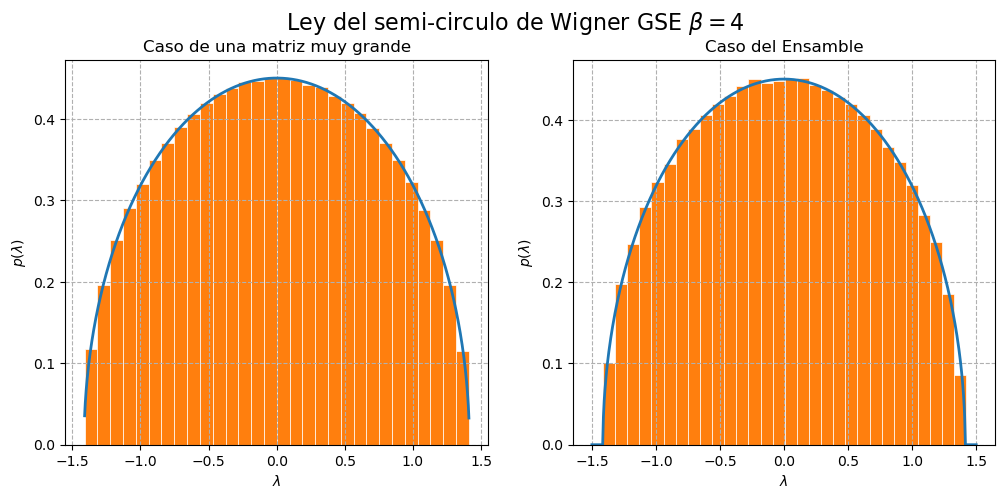

In [60]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

fig.suptitle(r'Ley del semi-circulo de Wigner GSE $ \beta=4 $',fontsize=16)

ax[0].plot(xnormmat,plamNormmat,lw=2)
ax[0].hist(Evalsmat/np.sqrt(4*nmat),bins=30,density=True,linewidth=0.5,edgecolor='white')
ax[0].grid(True,linestyle='--')
ax[0].set_title('Caso de una matriz muy grande')
ax[0].set_xlabel(r'$ \lambda $')
ax[0].set_ylabel(r'$ p(\lambda) $')

ax[1].plot(xlamens,plamens,lw=2)
ax[1].hist(EnsSinRep/np.sqrt(4),bins=30,density=True,linewidth=0.5,edgecolor='white')
ax[1].grid(True,linestyle='--')
ax[1].set_title('Caso del Ensamble')
ax[1].set_xlabel(r'$ \lambda $')
ax[1].set_ylabel(r'$ p(\lambda) $')

plt.savefig('Semi-CirculoGSE.png',dpi=300)

In [62]:
sfunmat = np.linspace(0,5,100)
psmat = densidadmat.Ps(sfunmat)

In [64]:
xsens = np.linspace(0,5,1000)
psens = densidadens.Ps(xsens)

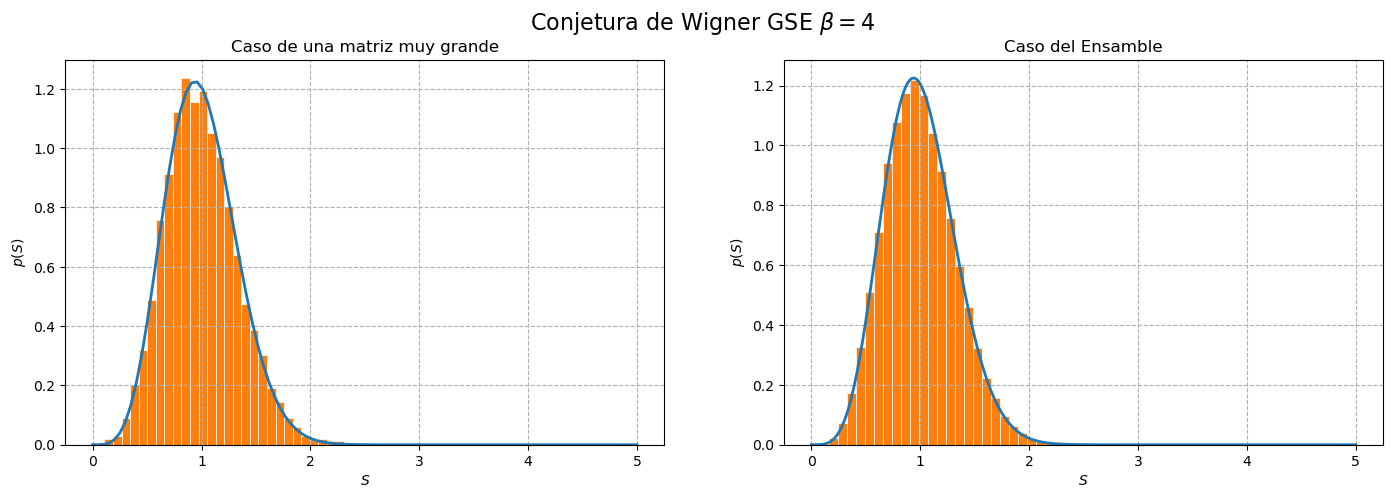

In [78]:
fig, ax = plt.subplots(1,2,figsize=(17,5))

fig.suptitle(r'Conjetura de Wigner GSE $ \beta=4 $',fontsize=16)

ax[0].plot(sfunmat,psmat,lw=2)
ax[0].hist(Smat,bins=30,density=True,linewidth=0.5,edgecolor='white')
ax[0].grid(True,linestyle='--')
ax[0].set_title('Caso de una matriz muy grande')
ax[0].set_xlabel(r'$ S $')
ax[0].set_ylabel(r'$ p(S) $')

ax[1].plot(xsens,psens,lw=2)
ax[1].hist(Sens,bins=30,density=True,linewidth=0.5,edgecolor='white')
ax[1].grid(True,linestyle='--')
ax[1].set_title('Caso del Ensamble')
ax[1].set_xlabel(r'$ S $')
ax[1].set_ylabel(r'$ p(S) $')

plt.savefig('ConjeturaWignerGSE.png',dpi=300)

In [80]:
xrmat = np.linspace(0,10,1000)
prmat = densidadmat.Pr(xrmat)

In [82]:
xrens = np.linspace(0,10,1000)
prens = densidadens.Pr(xrens)

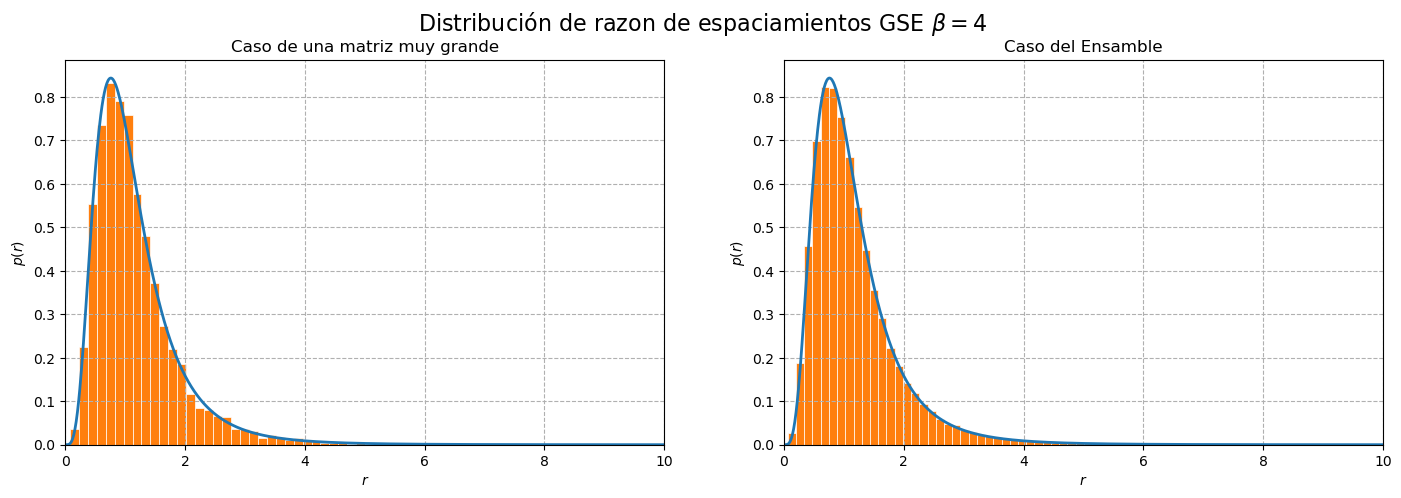

In [100]:
fig, ax = plt.subplots(1,2,figsize=(17,5))

fig.suptitle(r'Distribución de razon de espaciamientos GSE $ \beta=4 $',fontsize=16)

ax[0].plot(xrmat,prmat,lw=2)
ax[0].hist(rmat,bins=100,density=True,linewidth=0.5,edgecolor='white')
ax[0].grid(True,linestyle='--')
ax[0].set_title('Caso de una matriz muy grande')
ax[0].set_xlabel(r'$ r $')
ax[0].set_ylabel(r'$ p(r) $')
ax[0].set_xlim(0,10)

ax[1].plot(xrens,prens,lw=2)
ax[1].hist(rens,bins=150,density=True,linewidth=0.5,edgecolor='white')
ax[1].grid(True,linestyle='--')
ax[1].set_title('Caso del Ensamble')
ax[1].set_xlabel(r'$ r $')
ax[1].set_ylabel(r'$ p(r) $')
ax[1].set_xlim(0,10)

plt.savefig('prGSE.png',dpi=300)